### Lab 16: RNN for Sentiment Analysis (IMDB Dataset)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 68ms/step - accuracy: 0.5938 - loss: 0.6483 - val_accuracy: 0.7748 - val_loss: 0.4765
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 70ms/step - accuracy: 0.8056 - loss: 0.4253 - val_accuracy: 0.6696 - val_loss: 0.6040
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - accuracy: 0.8152 - loss: 0.4124 - val_accuracy: 0.7286 - val_loss: 0.5836
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - accuracy: 0.9473 - loss: 0.1517 - val_accuracy: 0.7872 - val_loss: 0.5542
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - accuracy: 0.9876 - loss: 0.0508 - val_accuracy: 0.8000 - val_loss: 0.6778

Test Accuracy: 0.7978


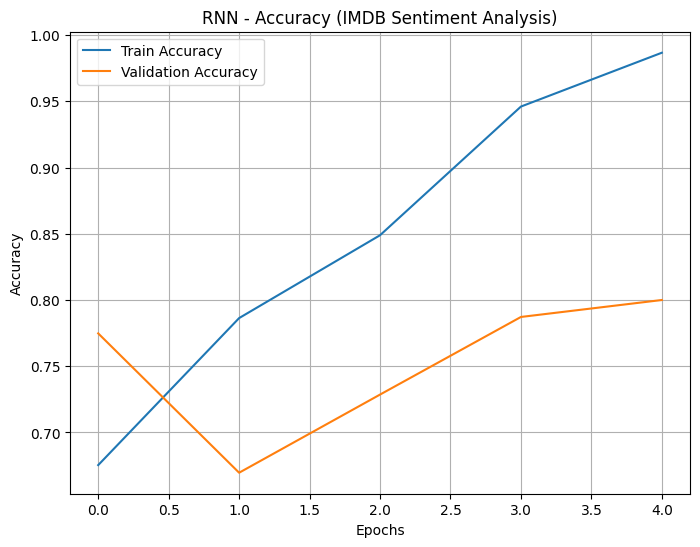

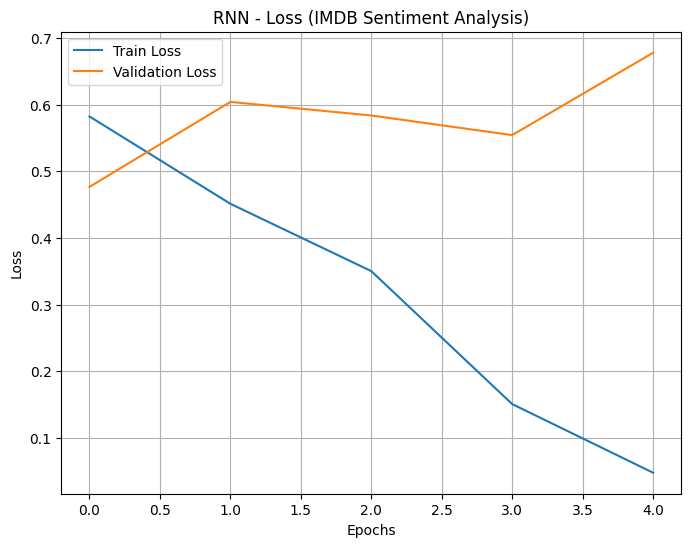

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step


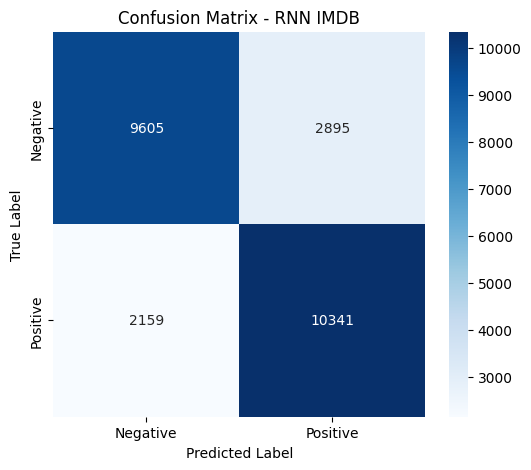


Classification Report - RNN IMDB
              precision    recall  f1-score   support

    Negative       0.82      0.77      0.79     12500
    Positive       0.78      0.83      0.80     12500

    accuracy                           0.80     25000
   macro avg       0.80      0.80      0.80     25000
weighted avg       0.80      0.80      0.80     25000



In [ ]:

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. Load IMDB dataset
max_features = 10000   # Vocabulary size
max_len = 200          # Sequence length

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_features)

# Pad sequences to ensure equal length
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

# 2. Build RNN Model
model = models.Sequential([
    layers.Embedding(input_dim=max_features, output_dim=128, input_length=max_len),
    layers.SimpleRNN(64, return_sequences=False),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 3. Train Model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=64,
    verbose=1
)

# 4. Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")

# 5. Plot Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("RNN - Accuracy (IMDB Sentiment Analysis)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 6. Plot Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("RNN - Loss (IMDB Sentiment Analysis)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# 7. Predictions
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()
y_true = y_test.flatten()

# 8. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix - RNN IMDB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 9. Classification Report
print("\nClassification Report - RNN IMDB")
print(classification_report(y_true, y_pred, target_names=['Negative', 'Positive']))
